In [1]:
#Activity 9

import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import pandas as pd

In [2]:
# checking SSL certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [3]:
top100url = 'https://www.gutenberg.org/browse/scores/top'     # calling on webpage to request access
response = requests.get(top100url)

In [4]:
def status_check(r):                            # created a function to ensure data transmitted was successful
    if r.status_code==200:
        print("Good!")
        return 1
    else:
        print("try again!")
        return -1

In [5]:
contents = response.content.decode(response.encoding)                  # encoding the data

In [6]:
soup = BeautifulSoup(contents, 'html.parser')                           # parsing data with beautifulsoup

In [7]:
# Empty list to hold all the http links in the HTML page
links=[]

In [8]:
for link in soup.find_all('a'):                                       # getting all href tags and placing them in the 
    links.append(link.get('href'))                                    # list of links.

In [9]:
links[:30]                                                           # displaying the first 30 href

['/wiki/Main_Page',
 '/catalog/',
 '/ebooks/',
 '/browse/recent/last1',
 '/browse/scores/top',
 '/wiki/Gutenberg:Offline_Catalogs',
 '/catalog/world/mybookmarks',
 '/wiki/Main_Page',
 'https://www.paypal.com/xclick/business=donate%40gutenberg.org&item_name=Donation+to+Project+Gutenberg',
 '/wiki/Gutenberg:Project_Gutenberg_Needs_Your_Donation',
 'http://www.ibiblio.org',
 'http://www.pgdp.net/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/11',
 '/ebooks/84',
 '/ebooks/74',
 '/ebooks/98',
 '/ebooks/25525',
 '/ebooks/1952',
 '/ebooks/43',
 '/ebooks/1635',
 '/ebooks/2701',
 '/ebooks/844']

In [10]:
book_number=[]                                # creating empty list to add file numbers

In [11]:
for i in range(19,119):
    link= links[i]
    link=link.strip()
    n=re.findall('[0-9]+',link)                     # using regex expression in locating numeric values in link string
    if len(n)==1:
        book_number.append(int(n[0]))                    # appending to integer

In [12]:
print ("The file numbers for the top 100 ebooks on Gutenberg:")       # printing the file numbers
print(book_number)

The file numbers for the top 100 ebooks on Gutenberg:
[1342, 11, 84, 74, 98, 25525, 1952, 43, 1635, 2701, 844, 1080, 120, 2542, 215, 76, 1661, 1250, 46, 174, 376, 5200, 514, 345, 1400, 16, 1184, 2591, 1260, 205, 2600, 55, 2852, 16328, 4300, 45, 1232, 113, 25344, 158, 2814, 36, 1064, 2500, 2097, 28054, 730, 768, 219, 27827, 1497, 160, 42324, 5740, 58585, 2554, 236, 62134, 43936, 3825, 6130, 42686, 1998, 62129, 203, 244, 3600, 35, 863, 17396, 3289, 58975, 135, 408, 996, 8800, 19942, 62123, 23700, 19033, 28860, 1399, 521, 161, 4363, 3207, 2680, 43453, 62137, 829, 33283, 766, 1001, 62117, 1727, 1322, 209, 42108, 105, 140]


In [13]:
print(soup.text[:2000])           # 9 printing first 2000 characters










      if (top != self) {
        top.location.replace ('http://www.gutenberg.org');
        alert ('Project Gutenberg is a FREE service with NO membership required. If you paid somebody else to get here, make them give you your money back!');
      }
    
 
Top 100 - Project Gutenberg








Online Book Catalog
=> 



 Book  Search
-- Recent  Books
-- Top  100
-- Offline Catalogs
-- My Bookmarks


Main Page




Project Gutenberg needs your donation! 
        More Info








Did you know that you can help us produce ebooks
by proof-reading just one page a day?
Go to: Distributed Proofreaders



Top 100


To determine the ranking we count the times each file gets downloaded.
Both HTTP and FTP transfers are counted.
Only transfers from ibiblio.org are counted as we have no access to our mirrors log files.
Multiple downloads from the same IP address on the same day count as one download.
IP addresses that download more than 100 files a day are considered
robots and are not cons

In [14]:
#  10 - empty list to place list of Ebook names
titles_file=[]

In [15]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')      # creating an index, using splitlines to split lines of the soup object.

In [16]:
for i in range(100):                           # looping the first 100 to the next 100 into the titles_files list
    titles_file.append(soup.text.splitlines()[start_idx+2+i])

In [17]:
titles=[]                                      # using match and span to extract only text from name string and append to titles list
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',titles_file[i]).span()
    titles.append(titles_file[i][id1:id2])

In [18]:
for t in titles:                           # printing the list
    print(t)

Pride and Prejudice by Jane Austen 
Alice
Frankenstein
The Adventures of Tom Sawyer by Mark Twain 
A Tale of Two Cities by Charles Dickens 
The Works of Edgar Allan Poe
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Strange Case of Dr
Ion by Plato 
Moby Dick
The Importance of Being Earnest
A Modest Proposal by Jonathan Swift 
Treasure Island by Robert Louis Stevenson 
Et dukkehjem
The Call of the Wild by Jack London 
Adventures of Huckleberry Finn by Mark Twain 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Anthem by Ayn Rand 
A Christmas Carol in Prose
The Picture of Dorian Gray by Oscar Wilde 
A Journal of the Plague Year by Daniel Defoe 
Metamorphosis by Franz Kafka 
Little Women by Louisa May Alcott 
Dracula by Bram Stoker 
Great Expectations by Charles Dickens 
Peter Pan by J
The Count of Monte Cristo
Grimms
Jane Eyre
Walden
War and Peace by graf Leo Tolstoy 
The Wonderful Wizard of Oz by L
The Hound of the Baskervilles by Arthur Conan Doyle 
Beowulf
Ulysses by J

In [19]:
# Activity 10


In [20]:
import urllib.request, urllib.parse, urllib.error
import json


In [21]:
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['omdbapi']

In [22]:
service_url = 'http://www.omdbapi.com/?'            #assigning OMDB portal as string
api_key = '&apikey='+omdbapi                        # varible api_key created with last portion of URL

In [23]:
def print_json(json_data):                          # creating function to print movie data from JSON file.
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [24]:
def poster_save(json_data):              # saving poster data as a image file
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension=poster_url.split('.')[-1]   # Splits the poster url with periods and picks up the last string as file extension
    poster_data = urllib.request.urlopen(poster_url).read()  # Reads the file from web
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):              # this will create new directory if there is no directory. 
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [25]:
def search_movie(title):                    # function to search for a movie by its name, and will print the json data and save the movie poster in local folder.
    try:
        url = service_url + urllib.parse.urlencode({'t': str(title)})+api_key
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':        # Asks user whether to download the poster of the movie
                poster_save(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [26]:
search_movie("Titanic")             # lets test the search function and search for the titanic movie

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=10075c4b
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian
Country: USA
Awards: Won 11 Oscars. Another 114 wins & 83 nominations.
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,004,959
imdbID: tt0120338
--------------------------------------------------


In [27]:
search_movie("/")             # entered bogus name to ensure search works and it does work.

Retrieving the data of "/" now... 
http://www.omdbapi.com/?t=%2F&apikey=10075c4b
Error encountered:  Movie not found!


In [28]:
# Activity 3 Twitter

import twitter
import os


In [29]:
api = twitter.Api(consumer_key='jjjjjjjjjjjjjjjj',
  consumer_secret='jjjjjjjjjjjjjjjjjjjjj',
    access_token_key='jjjjjjjjjjjjjjjjjj',
    access_token_secret='jjjjjjjjjjjjjjjjj')

In [ ]:
print(api.VerifyCredentials())

In [31]:
statuses = api.GetUserTimeline(screen_name='BellevueU')
print([s.text for s in statuses])

["All four of these women grew up in foster care and attend or have graduated from Bellevue University. They've overc… https://t.co/9LiOwLM4ge", 'Moms are heroes. 💛💜 Happy #MothersDay. https://t.co/pcZFOceuMd', 'Thank you, teachers. 🍎 #NationalTeachersWeek https://t.co/ulqeKuntHu', "We wish we were parading today in celebration of #CincodeMayo.✨🇲🇽 We're still celebrating from home! ★ Pictures fro… https://t.co/HwZsly3VwQ", '@BellevueWBB Happy birthday!!', 'Our President, Dr. Mary Hawkins, was recently interviewed by our Dr. Emad Rahim for Intelligent HQ. Get inside the… https://t.co/i9Ka9JM9Jt', 'RT @TodayWithBBB: BBB &amp; @AARPNE present online workshops - Protect Yourself and Your Family in This Crazy Online World feat. @RonW123, @Bel…', "@Badgerseeker That is so great to hear, Ashley! We're happy for you. We'd love to learn more –\xa0can you message us? 🙂", '@Badgerseeker Congratulations, Ashley! What degree program?', 'RT @crishm: Never doubt the power of a community working toget

In [32]:
# Activity 4 Visualization

import seaborn as sns

In [33]:
df = pd.read_csv("core_trends.csv")

In [34]:
df.head


<bound method NDFrame.head of       respid  sample  comp  int_date  lang  cregion  state  density  sfips  \
0          4       1     1    190108     1        3     37        2  37069   
1          7       1     1    190108     1        2     39        3  39025   
2          9       1     1    190108     1        1     34        4  34025   
3         10       1     1    190108     1        2     18        3  18039   
4         11       1     1    190114     1        2     26        2  26027   
...      ...     ...   ...       ...   ...      ...    ...      ...    ...   
1497  300194       2     1    190203     1        4      6        2   6085   
1498  300195       2     1    190203     1        4     53        1  53025   
1499  300196       2     1    190204     1        1     36        5  36061   
1500  300199       2     1    190204     1        4      6        2   6083   
1501  300200       2     1    190205     1        3     48        2  48027   

     usr  ... inc  party  partyln

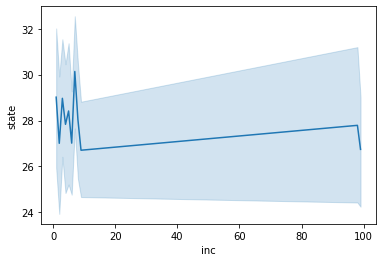

In [35]:
# line plot

sns.lineplot(data=df, x='inc',y='state')

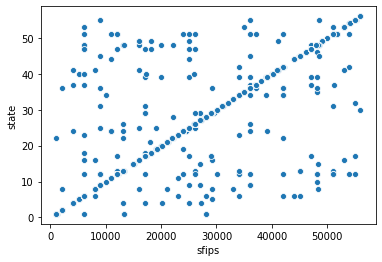

In [36]:
sns.scatterplot(x='sfips', y='state', data=df)   #scatterplot

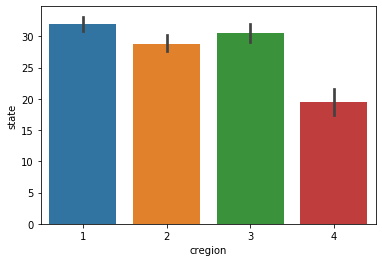

In [37]:
# creating bar plot

sns.barplot(x= 'cregion',y= 'state', data=df)

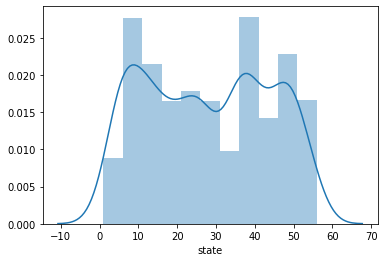

In [38]:
# creating histogram

sns.distplot( df["state"] )